In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
data = pd.read_csv("/content/CC GENERAL.csv")
print(f"Dataset Shape: {data.shape}")
data.head()

Dataset Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Descriptive Statistics
print(data.describe())

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [4]:
# Data Preprocessing
## Check for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print(f"Missing Values:\n{missing_values}")

## Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data.iloc[:, 1:])  # Exclude non-numeric columns
data_imputed = pd.DataFrame(data_imputed, columns=data.columns[1:])
print(f"Missing values after imputation: {data_imputed.isnull().sum().sum()}")

## Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)
print(f"Scaled Data Shape: {data_scaled.shape}")

Missing Values:
MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64
Missing values after imputation: 0
Scaled Data Shape: (8950, 17)


In [5]:
# Model Selection
## Use Elbow Method and Silhouette Score to determine optimal clusters
cost = []
silhouette_scores = []

for n_clusters in range(2, 11):  # Test for 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    cost.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

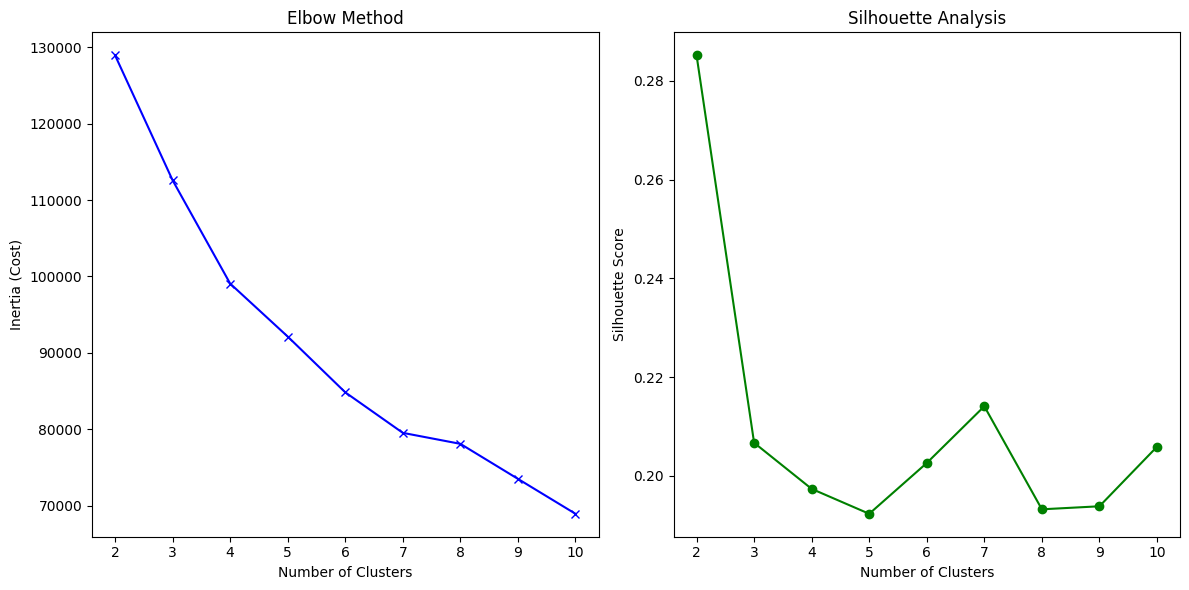

In [6]:
# Plot Elbow Curve and Silhouette Scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), cost, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Cost)')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

In [7]:
# Choose Optimal Clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal Number of Clusters: {optimal_clusters}")

Optimal Number of Clusters: 2


In [8]:
# Final KMeans Model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

In [9]:
# Add cluster labels to original data
clusters = pd.concat([data.iloc[:, :1], pd.DataFrame(labels, columns=['Cluster'])], axis=1)
print(clusters.head())

  CUST_ID  Cluster
0  C10001        1
1  C10002        1
2  C10003        0
3  C10004        1
4  C10005        1


In [10]:
# Evaluate Clustering
silhouette_avg = silhouette_score(data_scaled, labels)
davies_bouldin = davies_bouldin_score(data_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

Silhouette Score: 0.29
Davies-Bouldin Index: 1.79


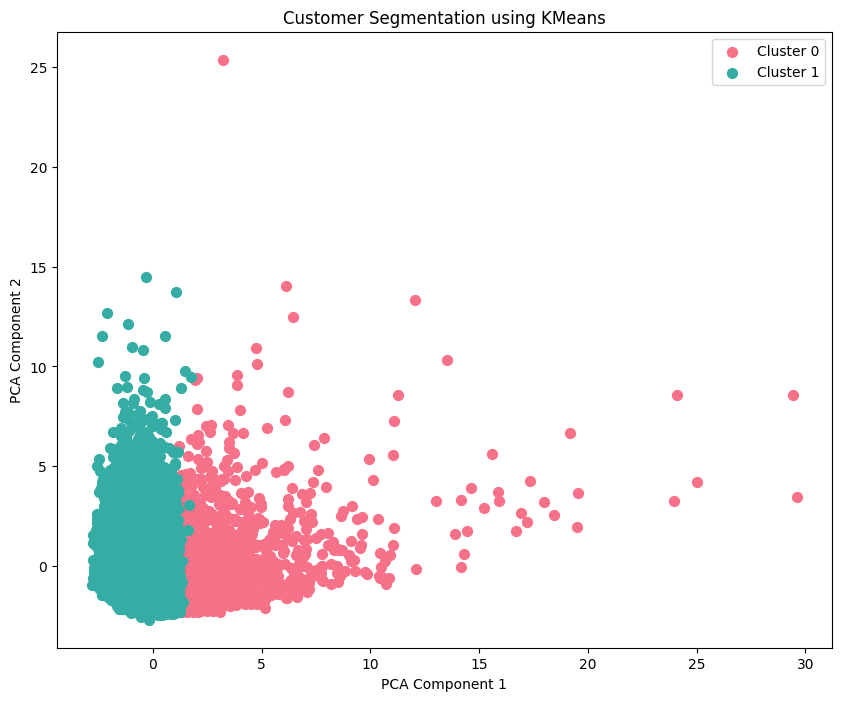

In [11]:
# Visualization
## PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
## Plot Clusters
plt.figure(figsize=(10, 8))
colors = sns.color_palette('husl', optimal_clusters)
for cluster in range(optimal_clusters):
    plt.scatter(
        pca_result[labels == cluster, 0],
        pca_result[labels == cluster, 1],
        label=f'Cluster {cluster}',
        color=colors[cluster],
        s=50
    )
plt.title("Customer Segmentation using KMeans")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()